In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import scipy.stats as ss

In [2]:
data = pd.read_csv('incidents_clean.csv')
data['start_dt'] = pd.to_datetime(data['starttime_new'])
data['start_date'] = data['start_dt'].dt.date
data.head()

,type,starttime_new,endtime_new,vild_primair_wegnummer,primaire_locatie_lengtegraad,primaire_locatie_breedtegraad,duration,start_dt,start_date
0,vehicle_obstruction,2019-08-28 12:11:32,2019-12-11 11:32:28,A1,4.974663,52.346931,151160.933333,2019-08-28 12:11:32,2019-08-28
1,vehicle_obstruction,2019-08-28 12:11:32,2019-12-11 11:32:28,A9,4.716725,52.514820,151160.933333,2019-08-28 12:11:32,2019-08-28
2,vehicle_obstruction,2019-08-28 12:11:32,2019-12-11 11:32:28,A9,4.738364,52.609730,151160.933333,2019-08-28 12:11:32,2019-08-28
3,vehicle_obstruction,2019-08-28 12:11:32,2019-12-11 11:32:28,A35,6.824692,52.204929,151160.933333,2019-08-28 12:11:32,2019-08-28
4,vehicle_obstruction,2019-08-28 12:11:32,2019-12-11 11:32:28,A4,4.346407,52.041920,151160.933333,2019-08-28 12:11:32,2019-08-28


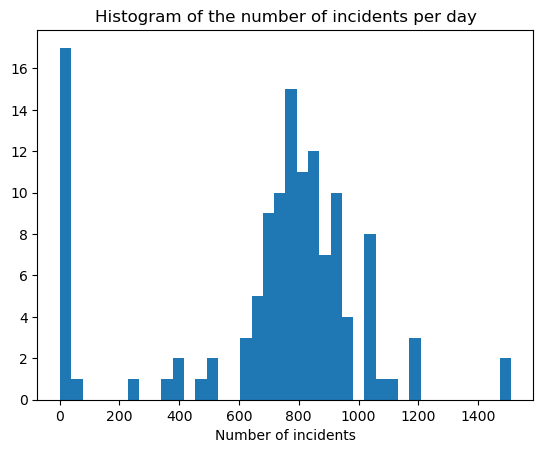

In [3]:
plt.hist(data['start_date'].value_counts(), bins=40)
plt.title('Histogram of the number of incidents per day')
plt.xlabel('Number of incidents');

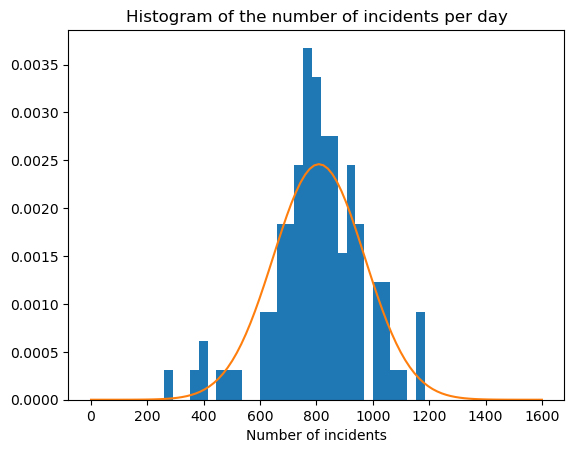

In [4]:
counts = data['start_date'].value_counts()
n_counts = counts[counts > 200][counts < 1400] # extreme outliers are not taken into account
mean = n_counts.mean()
std = np.std(n_counts)

x = np.linspace(0, 1600, 100)
plt.hist(n_counts, bins=30, density=True)
plt.plot(x, ss.norm.pdf(x, loc=mean, scale=std))
plt.title('Histogram of the number of incidents per day')
plt.xlabel('Number of incidents');

Running the optimization for multiple days will results in different optimal locations of the road inspectors. A way of combining them is by assigning a value of 1 to a node where a node inspectors is placed on a certain day and 0 otherwise. This value is then multiplied by a weight, which is derived from the likelihood of the number of incidents that happened on that day. In this way the locations of the road inspectors from a day with around 800 incidents will weigh heavier in the final placement than the locations of the road inspectors optimized for a day with 400 or 1200 incidents. Once the final locations of the road inspectors have been determined the validation can be done by getting the incident data from days which were not used in the calibration and calculating what the average travel time per incident is on those days.